In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
result_path = r"D:\OneDrive\ETHY3FW\EBD\exercise_3\data_analysis.csv"
plot_path = r"D:\OneDrive\ETHY3FW\EBD\exercise_3\04 visualization"
data = pd.read_csv(result_path, index_col=[0, 1])

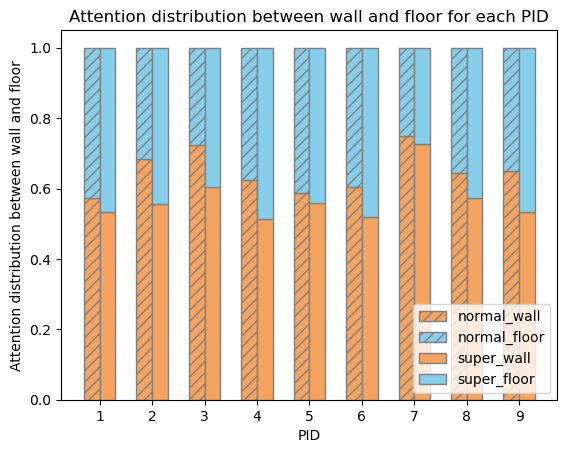

In [65]:
"""
content of the csv file:
PID	category	pretest	overallDifficulty	relativeDifficulty	Duration	Distance	AverageSpeed	ShortestPathDistance	SurplusShortestPath	RatioShortestPath	Wall	Floor
1	normal	    33.17	2	                1	                34.392	    99.39	    2.89	        17.763	                81.626	            5.595	            0.574	0.426
2	normal	    33.1	2	                2	                21.148	    61.918	    2.928	        17.763	                44.154	            3.486	            0.683	0.317
3	normal	    32.52	1	                1	                39.67	    110.422	    2.784	        17.763	                92.658	            6.216	            0.724	0.276
4	normal	    32.49	3	                1	                87.695	    211.132	    2.408	        17.763	                193.368	            11.886	            0.625	0.375
5	normal	    33.04	1	                1	                18.23	    46.003	    2.523	        17.763	                28.24	            2.59	            0.588	0.412
6	normal	    92.27	3	                1	                44.079	    100.572	    2.282	        17.763	                82.809	            5.662	            0.605	0.395
1	super	    28.05	2	                1	                18.062	    53.099	    2.94	        17.763	                35.335	            2.989	            0.533	0.467
2	super	    32.31	2	                2	                16.35	    45.771	    2.799	        17.763	                28.007	            2.577	            0.555	0.445
3	super	    32.64	1	                1	                16.843	    50.378	    2.991	        17.763	                32.615	            2.836	            0.603	0.397
4	super	    33.21	3	                1	                18.569	    51.224	    2.759	        17.763	                33.461	            2.884	            0.514	0.486
5	super	    32.79	1	                1	                15.126	    46.162	    3.052	        17.763	                28.398	            2.599	            0.559	0.441
6	super	    45.39	3	                1	                17.087	    47.189	    2.762	        17.763	                29.425	            2.657	            0.518	0.482
            
"""
# plot stacked bar plot of wall and floor data for each PID in different categories using matplotlib
fig, ax = plt.subplots()
barWidth = 0.3
r1 = range(len(data.index.get_level_values(0).unique()))
r2 = [x + barWidth for x in r1]

ax.bar(r1, data.loc[(slice(None), 'normal'), 'Wall'], color='sandybrown', width=barWidth, edgecolor='grey', label='normal_wall', hatch='///')
ax.bar(r1, data.loc[(slice(None), 'normal'), 'Floor'], color='skyblue', width=barWidth, edgecolor='grey', label='normal_floor', bottom=data.loc[(slice(None), 'normal'), 'Wall'], hatch='///')
ax.bar(r2, data.loc[(slice(None), 'super'), 'Wall'], color='sandybrown', width=barWidth, edgecolor='grey', label='super_wall')
ax.bar(r2, data.loc[(slice(None), 'super'), 'Floor'], color='skyblue', width=barWidth, edgecolor='grey', label='super_floor', bottom=data.loc[(slice(None), 'super'), 'Wall'])

ax.set_xticks([r + barWidth/2 for r in range(len(data.index.get_level_values(0).unique()))])
ax.set_xticklabels(data.index.get_level_values(0).unique())
ax.set_xlabel('PID')
ax.set_ylabel('Attention distribution between wall and floor')
ax.set_title('Attention distribution between wall and floor for each PID')
plt.legend(loc="lower right")
fig.savefig(plot_path + '/01_stacked_bar_plot_wall_floor.png', dpi=300, bbox_inches='tight')
plt.show()


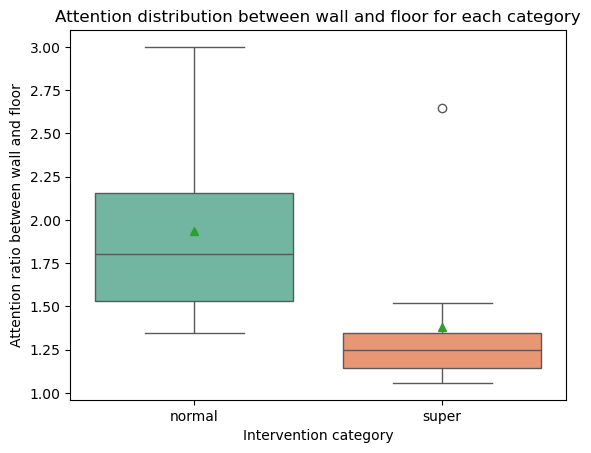

In [66]:
# calculate the ratio of wall and floor attention for each PID in different categories, and plot the result using boxplot.
# it should show in total two boxes, one for normal category and one for super category.
data['Wall/Floor'] = data['Wall'] / data['Floor']
sns.boxplot(x='category', y='Wall/Floor', data=data, hue='category', palette='Set2', showmeans=True)
plt.title('Attention distribution between wall and floor for each category')
plt.xlabel('Intervention category')
plt.ylabel('Attention ratio between wall and floor')
plt.savefig(plot_path + '/02_boxplot_wall_floor.png', dpi=300, bbox_inches='tight')
plt.show()

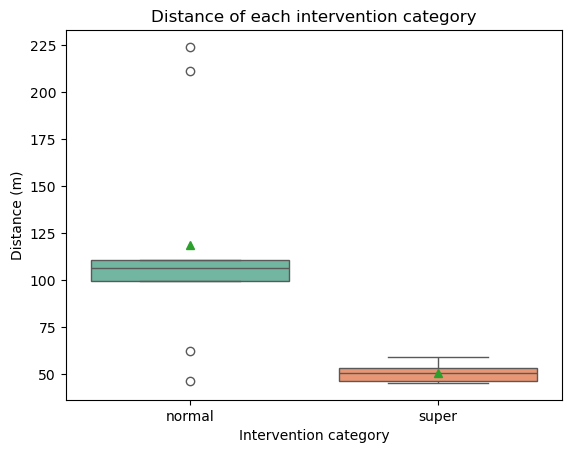

In [67]:
sns.boxplot(x='category', y="Distance", data=data, hue='category', palette='Set2', showmeans=True)
plt.title('Distance of each intervention category')
plt.xlabel('Intervention category')
plt.ylabel('Distance (m)')
plt.savefig(plot_path + '/03_boxplot_distance.png', dpi=300, bbox_inches='tight')

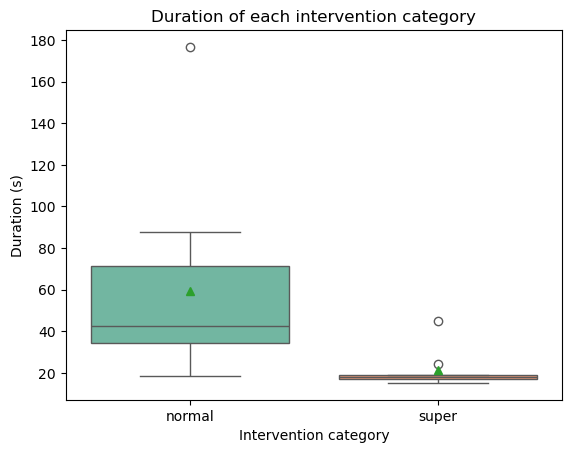

In [68]:
sns.boxplot(x='category', y='Duration', data=data, hue='category', palette='Set2', showmeans=True)
plt.title('Duration of each intervention category')
plt.xlabel('Intervention category')
plt.ylabel('Duration (s)')
plt.savefig(plot_path + '/04_barplot_duration.png', dpi=300, bbox_inches='tight')

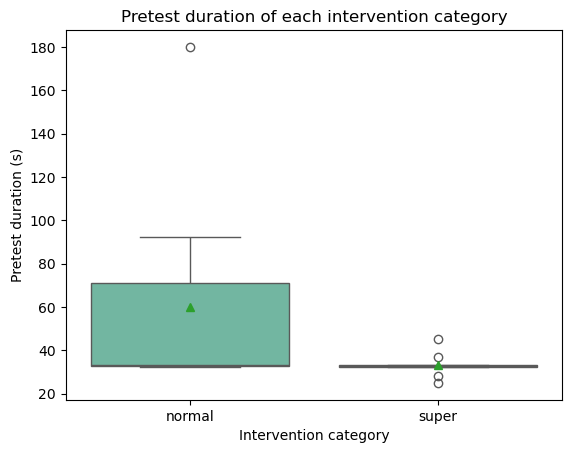

In [69]:
sns.boxplot(x='category', y="pretest", data=data, hue='category', palette='Set2', showmeans=True)
plt.title('Pretest duration of each intervention category')
plt.xlabel('Intervention category')
plt.ylabel('Pretest duration (s)')
plt.savefig(plot_path + '/05_boxplot_pretest.png', dpi=300, bbox_inches='tight')

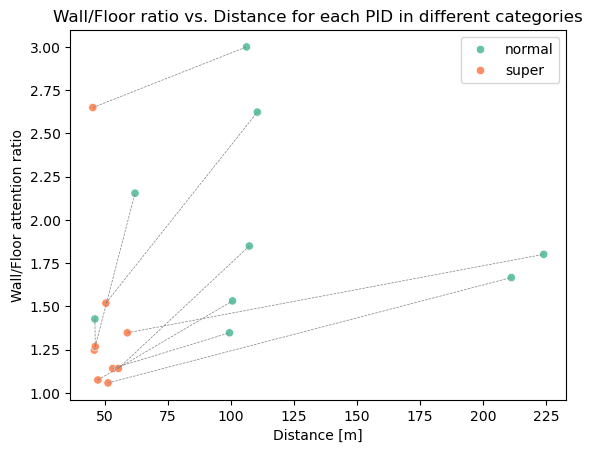

In [70]:
# plot Wall/Floor ratio vs. Duration for each PID in different categories. Note that category is the second level of the index.
fig, ax = plt.subplots()
sns.scatterplot(x='Distance', y='Wall/Floor', data=data, hue='category', palette='Set2', ax=ax)
# add one line between each pair of points between normal and super category
for i in data.index.get_level_values(0).unique():
    sns.lineplot(x=[data.loc[(i, 'normal'), 'Distance'], data.loc[(i, 'super'), 'Distance']],
                    y=[data.loc[(i, 'normal'), 'Wall/Floor'], data.loc[(i, 'super'), 'Wall/Floor']], ax=ax, color='grey', linestyle='--', linewidth=0.5)
plt.title('Wall/Floor ratio vs. Distance for each PID in different categories')
plt.xlabel('Distance [m]')
plt.ylabel('Wall/Floor attention ratio')
plt.savefig(plot_path + '/06_scatterplot_wall_floor_distance.png', dpi=300, bbox_inches='tight')
plt.show()

double-sided t-test result for pretest: t=1.5961100131878665, p=0.13002386022089218
double-sided t-test result for Duration: t=2.297175116196516, p=0.0354417557568846
double-sided t-test result for Distance: t=3.37509579331201, p=0.003857619636843891
double-sided t-test result for AverageSpeed: t=-0.9025604800501036, p=0.38014645144766324
double-sided t-test result for SurplusShortestPath: t=3.37510221711737, p=0.003857567365428627
double-sided t-test result for RatioShortestPath: t=3.3750209597930816, p=0.003858228619626596
double-sided t-test result for Wall: t=2.722368138486736, p=0.015065164882940282
double-sided t-test result for Floor: t=-2.722368138486738, p=0.015065164882940258
double-sided t-test result for Wall/Floor: t=2.2040524326270607, p=0.04251090628255146


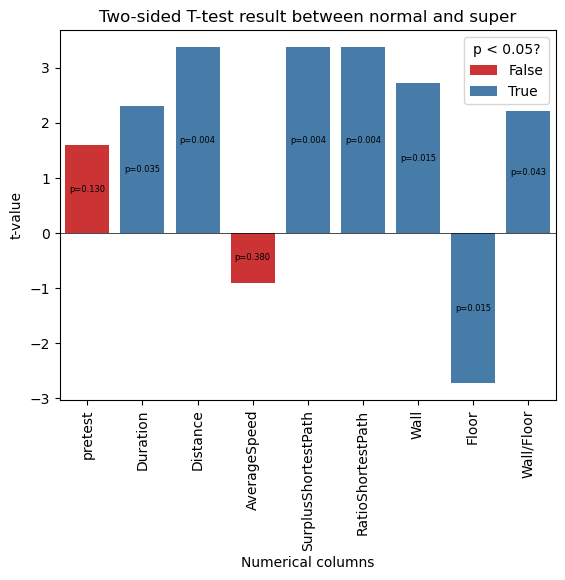

In [71]:
# perform t-test with two sided in all numerical columns between normal and super category
tp_dict = {}
data_copy = data.copy().drop(columns=["ShortestPathDistance"])
for column in data_copy.columns:
    # check if column is numerical
    if data_copy[column].dtype in ['int64', 'float64'] and column not in ['overallDifficulty', 'relativeDifficulty']:
        # exclude PID, pretest, overallDifficulty, relativeDifficulty from the t-test
        normal_data = data_copy.loc[(slice(None), 'normal'), column]
        super_data = data_copy.loc[(slice(None), 'super'), column]
        t, p = ttest_ind(normal_data, super_data)
        print(f'double-sided t-test result for {column}: t={t}, p={p}')
        column_dict = {column: {'t': t, 'p': p}}
        tp_dict.update(column_dict)

# plot the t-test result
tp_df = pd.DataFrame(tp_dict).T
tp_df['significant'] = tp_df['p'] < 0.05
sns.barplot(x=tp_df.index, y='t', data=tp_df, hue='significant', palette='Set1', dodge=False)
# plot the barplot with t value labeled on top of the bars
# plt.bar(tp_df.index, tp_df['t'], color=tp_df['significant'].map({True: 'red', False: 'blue'}))

# also add p value to the plot
for i in range(len(tp_df)):
    plt.text(i, tp_df.iloc[i]['t']/2, f'p={tp_df.iloc[i]["p"]:.3f}', ha='center', va='center', color='black', fontsize=6)
plt.title('Two-sided T-test result between normal and super')
plt.xlabel('Numerical columns')
# set the x axis to be vertical
plt.xticks(rotation=90)
plt.ylabel('t-value')
# add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.5)
# set the title of the legend to be "p < 0.05"
plt.legend(title='p < 0.05?')
plt.savefig(plot_path + '/07_t_test_result.png', dpi=300, bbox_inches='tight')
plt.show()

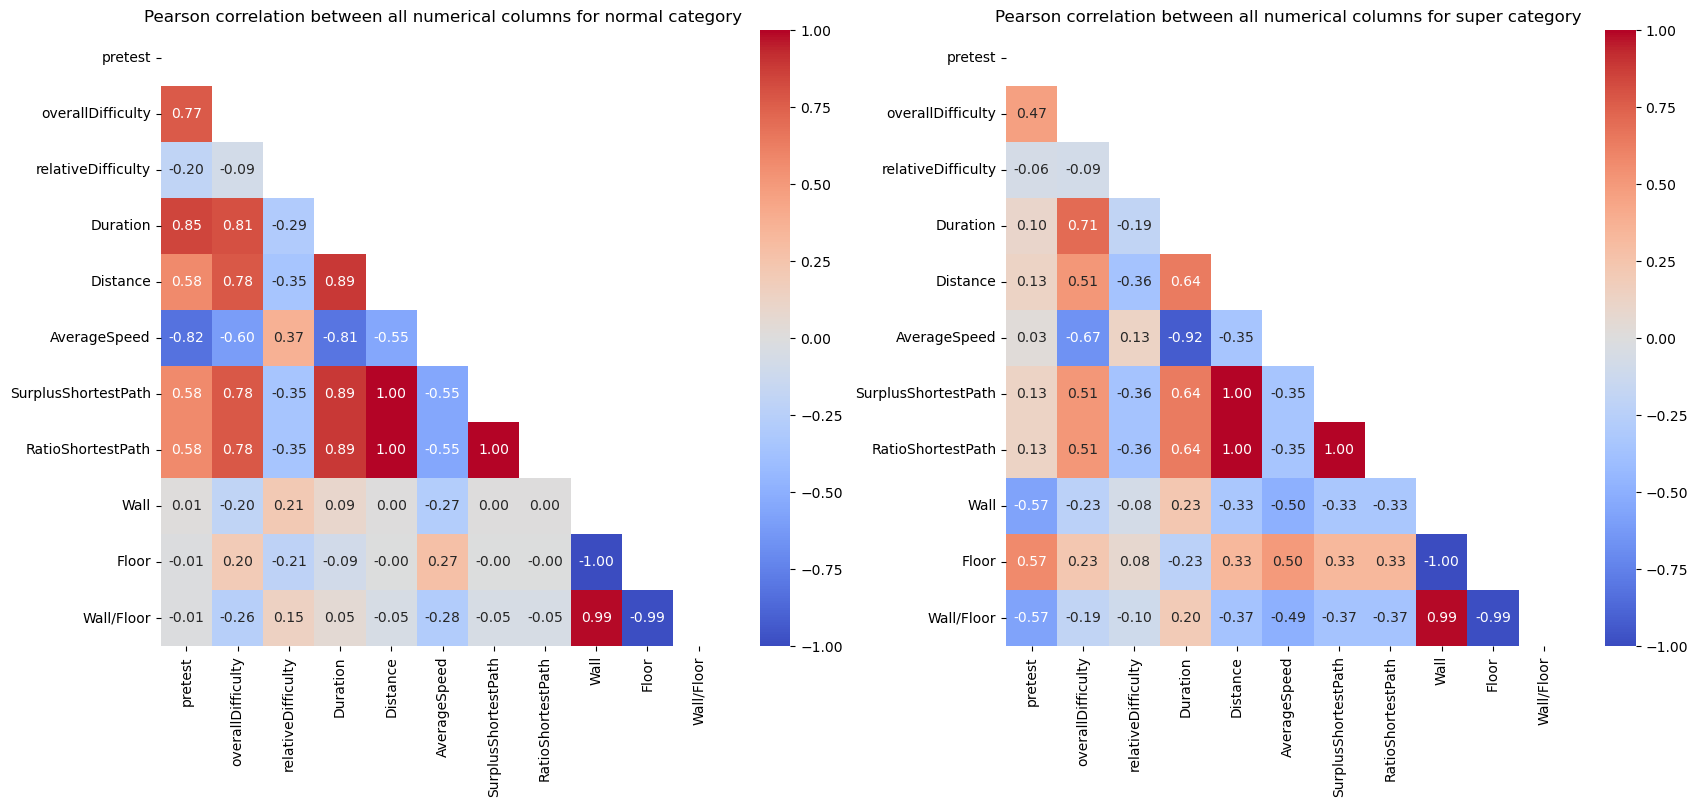

In [ ]:
# create two subplots, left showing correlation heatmap of normal category, right showing correlation heatmap of super category
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'normal'), :].corr(), dtype=bool))
sns.heatmap(data_copy.loc[(slice(None), 'normal'), :].corr(), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[0])
ax[0].set_title('Pearson correlation between all numerical columns for normal category')
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'super'), :].corr(), dtype=bool))
sns.heatmap(data_copy.loc[(slice(None), 'super'), :].corr(), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[1])
ax[1].set_title('Pearson correlation between all numerical columns for super category')
ax[0].collections[0].set_clim(-1, 1)
ax[1].collections[0].set_clim(-1, 1)
fig.savefig(plot_path + '/08_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

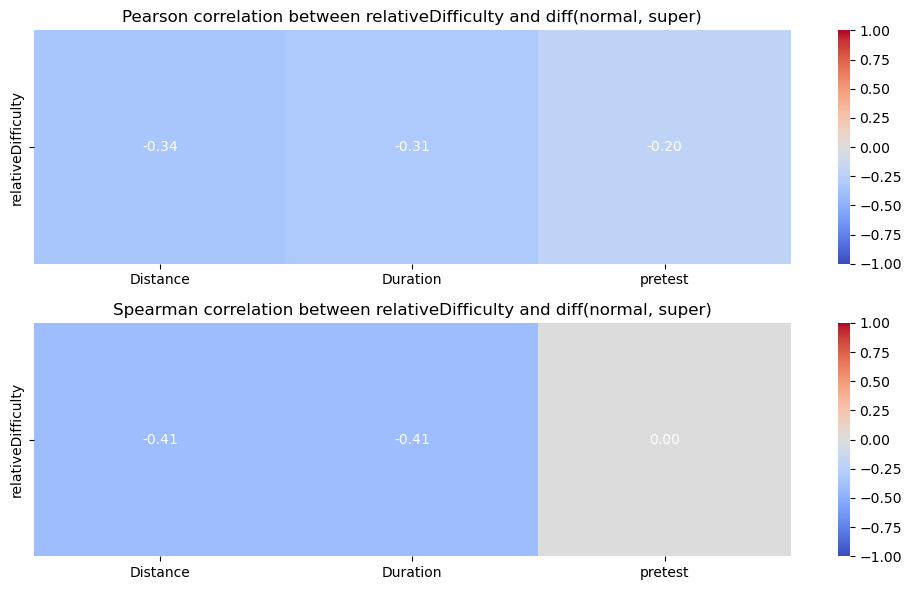

In [4]:
# calculate the relative difficulty's correlation with the difference between normal and super's distance, duration. and visualize them.
data_copy = data.copy().drop(columns=["ShortestPathDistance"])
rel_difficulty = data_copy.loc[(slice(None), 'normal'), 'relativeDifficulty']
diff_df = pd.DataFrame(index=rel_difficulty.index)
diff_df['relativeDifficulty'] = rel_difficulty
for column in ['Distance', 'Duration', 'pretest']:
    diff = data_copy.loc[(slice(None), 'normal'), column].values - data_copy.loc[(slice(None), 'super'), column].values
    diff_df[column] = diff

# show the pearson, spearman correlation of rel_difficulty with other columns as a single-row heatmap (plot only 4 squares in one row per subplot)
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
corr_pearson = diff_df.corr(method='pearson').values[0, 1:]
corr_spearman = diff_df.corr(method='spearman').values[0, 1:]
sns.heatmap(corr_pearson.reshape(1, -1), annot=True, cmap='coolwarm', fmt=".2f", ax=ax[0])
ax[0].set_title('Pearson correlation between relativeDifficulty and diff(normal, super)')
ax[0].set_xticklabels(diff_df.columns[1:])
ax[0].set_yticklabels(['relativeDifficulty'])
sns.heatmap(corr_spearman.reshape(1, -1), annot=True, cmap='coolwarm', fmt=".2f", ax=ax[1])
ax[1].set_title('Spearman correlation between relativeDifficulty and diff(normal, super)')
ax[1].set_xticklabels(diff_df.columns[1:])
ax[1].set_yticklabels(['relativeDifficulty'])
ax[0].collections[0].set_clim(-1, 1)
ax[1].collections[0].set_clim(-1, 1)
fig.tight_layout()
fig.savefig(plot_path + '/15_correlation_relative_difficulty.png', dpi=300, bbox_inches='tight')
plt.show()




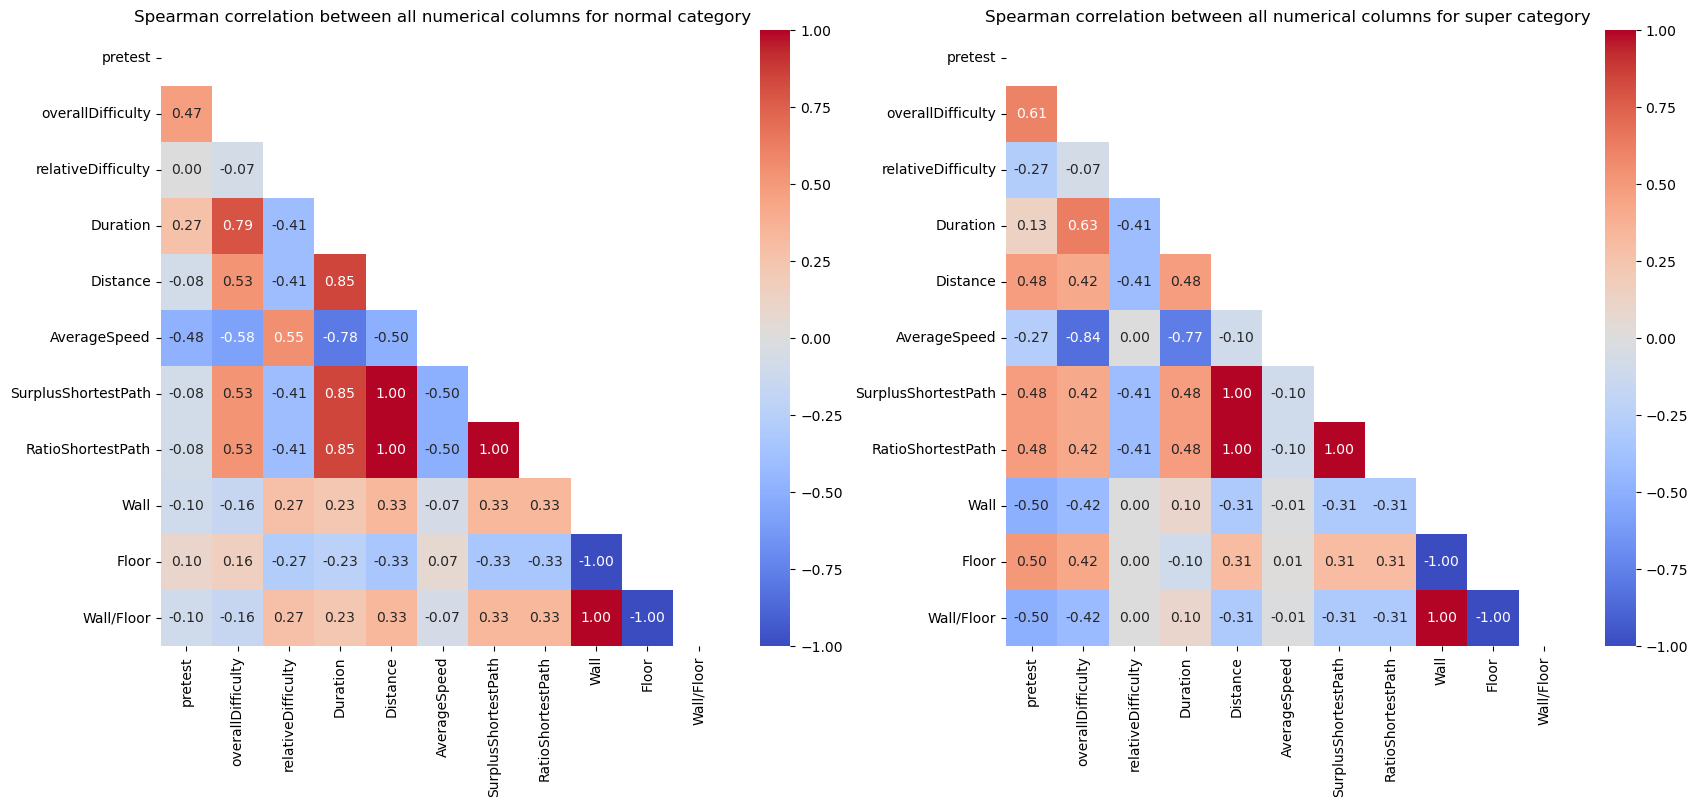

In [73]:
# create two subplots, left showing correlation heatmap of normal category, right showing correlation heatmap of super category
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'normal'), :].corr(method="spearman"), dtype=bool))
sns.heatmap(data_copy.loc[(slice(None), 'normal'), :].corr(method="spearman"), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[0])
ax[0].set_title('Spearman correlation between all numerical columns for normal category')
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'super'), :].corr(method="spearman"), dtype=bool))
sns.heatmap(data_copy.loc[(slice(None), 'super'), :].corr(method="spearman"), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[1])
ax[1].set_title('Spearman correlation between all numerical columns for super category')
ax[0].collections[0].set_clim(-1, 1)
ax[1].collections[0].set_clim(-1, 1)
fig.savefig(plot_path + '/09_spearman_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

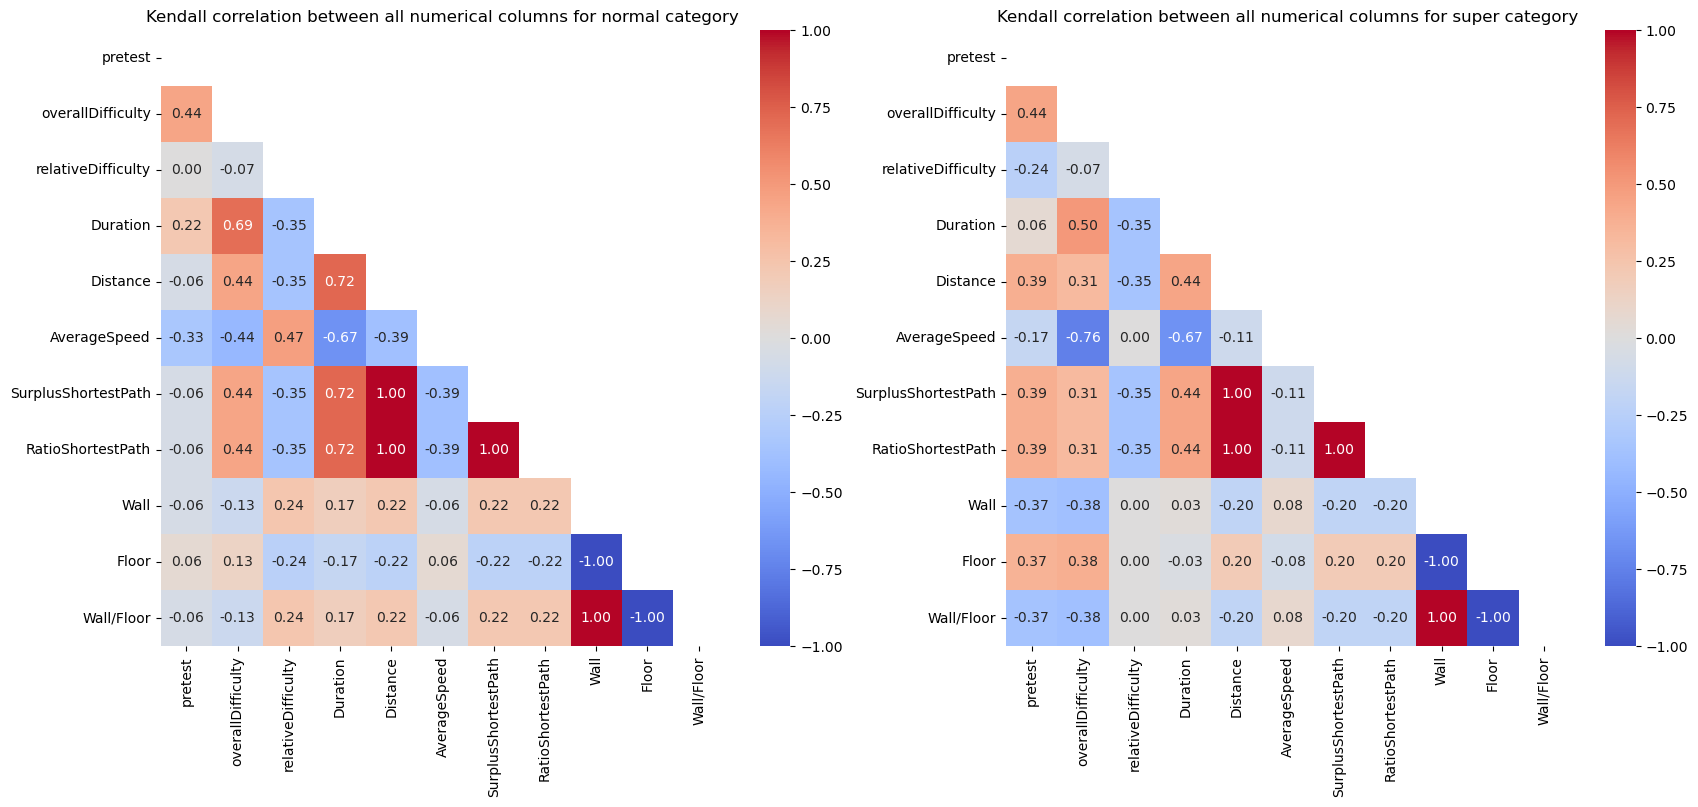

In [74]:
# do the same for kandall correlation
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'normal'), :].corr(method="kendall"), dtype=bool))
sns.heatmap(data_copy.loc[(slice(None), 'normal'), :].corr(method="kendall"), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[0])
ax[0].set_title('Kendall correlation between all numerical columns for normal category')
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'super'), :].corr(method="kendall"), dtype=bool))
sns.heatmap(data_copy.loc[(slice(None), 'super'), :].corr(method="kendall"), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[1])
ax[1].set_title('Kendall correlation between all numerical columns for super category')
ax[0].collections[0].set_clim(-1, 1)
ax[1].collections[0].set_clim(-1, 1)
fig.savefig(plot_path + '/10_kendall_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

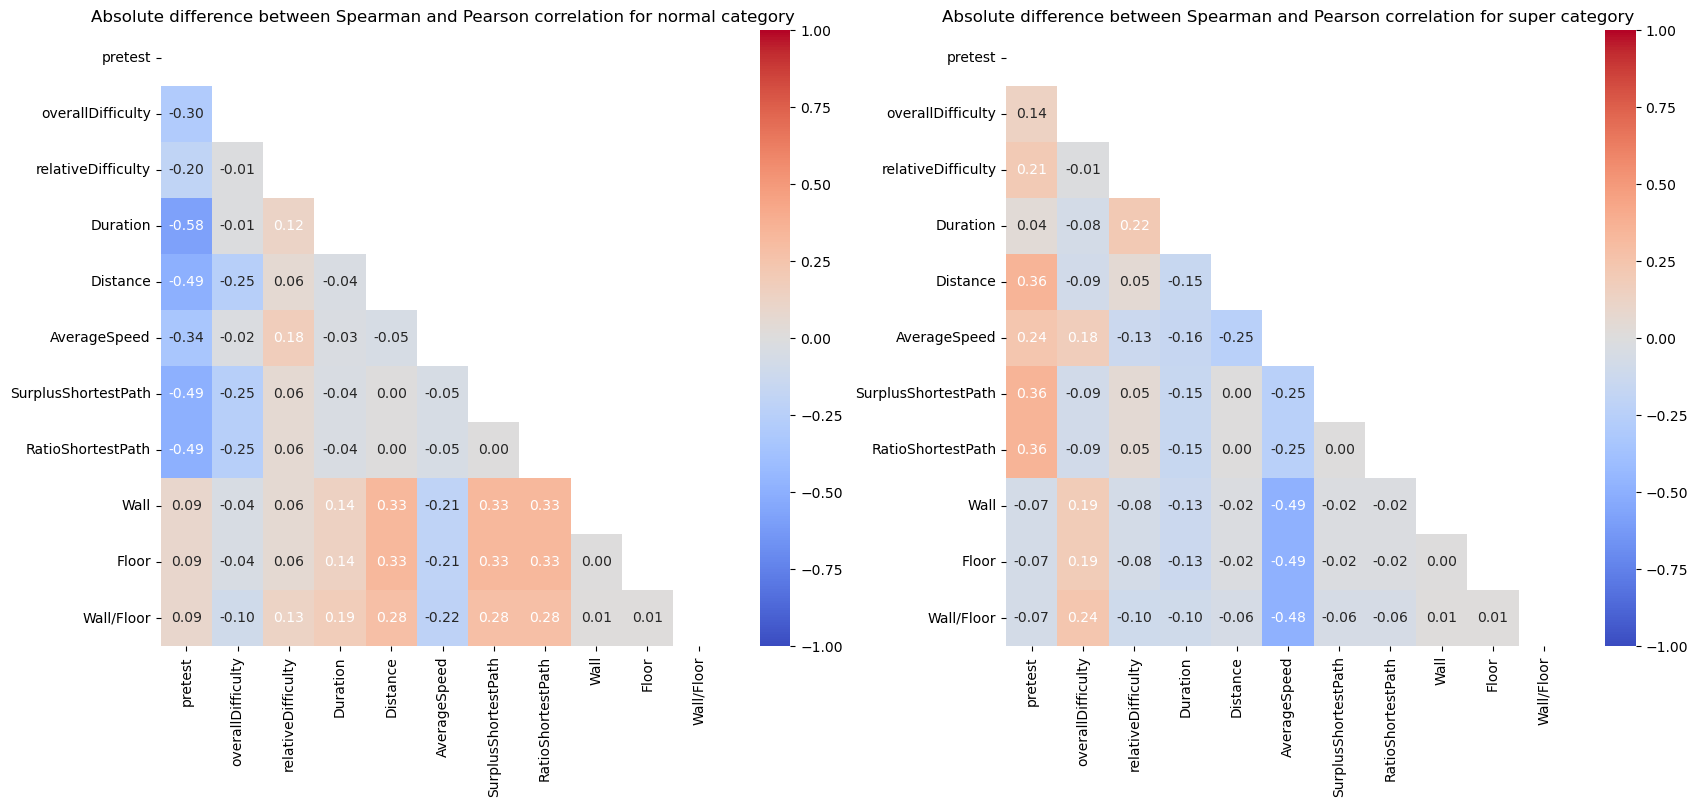

In [75]:
# plot the difference between spearmen and pearson correlation, to see if there is any difference due to the non-linear relationship in triangle shape
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'normal'), :].corr(method="spearman") - data_copy.loc[(slice(None), 'normal'), :].corr(), dtype=bool))
sns.heatmap(abs(data_copy.loc[(slice(None), 'normal'), :].corr(method="spearman")) - abs(data_copy.loc[(slice(None), 'normal'), :].corr()), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[0])
ax[0].set_title('Absolute difference between Spearman and Pearson correlation for normal category')
# set the colormap limit to be from -1 to 1
# first get the colorbar then set the limits
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'super'), :].corr(method="spearman") - data_copy.loc[(slice(None), 'super'), :].corr(), dtype=bool))
sns.heatmap(abs(data_copy.loc[(slice(None), 'super'), :].corr(method="spearman")) - abs(data_copy.loc[(slice(None), 'super'), :].corr()), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[1])
ax[1].set_title('Absolute difference between Spearman and Pearson correlation for super category')
ax[0].collections[0].set_clim(-1, 1)
ax[1].collections[0].set_clim(-1, 1)
fig.savefig(plot_path + '/11_difference_spearman_pearson_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


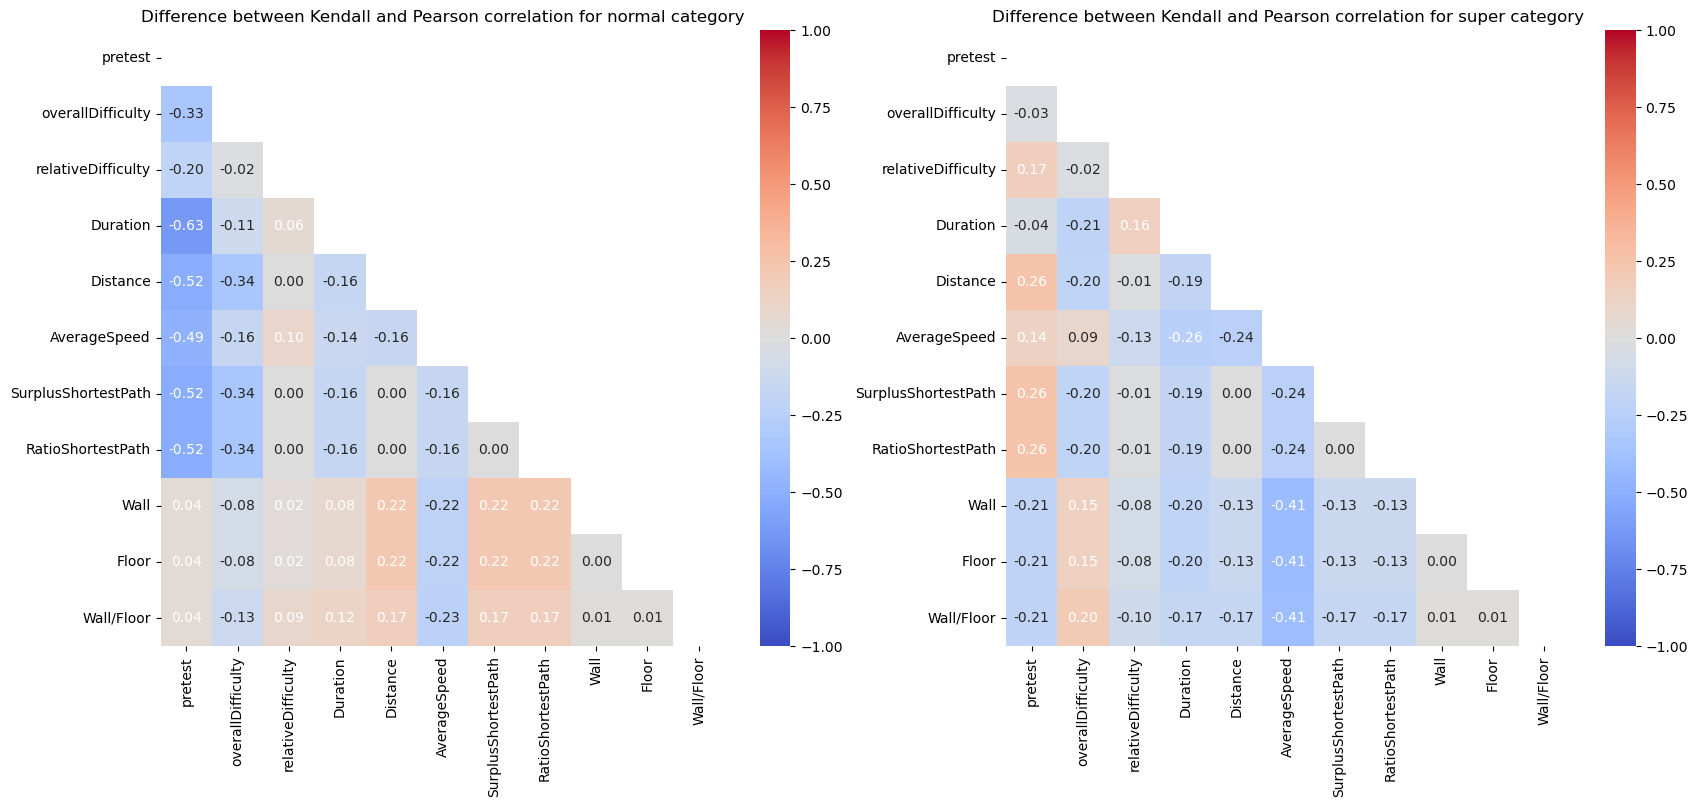

In [76]:
# plot the difference bwetween kendall and pearson correlation
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'normal'), :].corr(method="kendall") - data_copy.loc[(slice(None), 'normal'), :].corr(), dtype=bool))
sns.heatmap(abs(data_copy.loc[(slice(None), 'normal'), :].corr(method="kendall")) - abs(data_copy.loc[(slice(None), 'normal'), :].corr()), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[0])
ax[0].set_title('Difference between Kendall and Pearson correlation for normal category')
mask = np.triu(np.ones_like(data_copy.loc[(slice(None), 'super'), :].corr(method="kendall") - data_copy.loc[(slice(None), 'super'), :].corr(), dtype=bool))
sns.heatmap(abs(data_copy.loc[(slice(None), 'super'), :].corr(method="kendall")) - abs(data_copy.loc[(slice(None), 'super'), :].corr()), annot=True, cmap='coolwarm', fmt=".2f", mask=mask, ax=ax[1])
ax[1].set_title('Difference between Kendall and Pearson correlation for super category')
ax[0].collections[0].set_clim(-1, 1)
ax[1].collections[0].set_clim(-1, 1)
fig.savefig(plot_path + '/12_difference_kendall_pearson_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

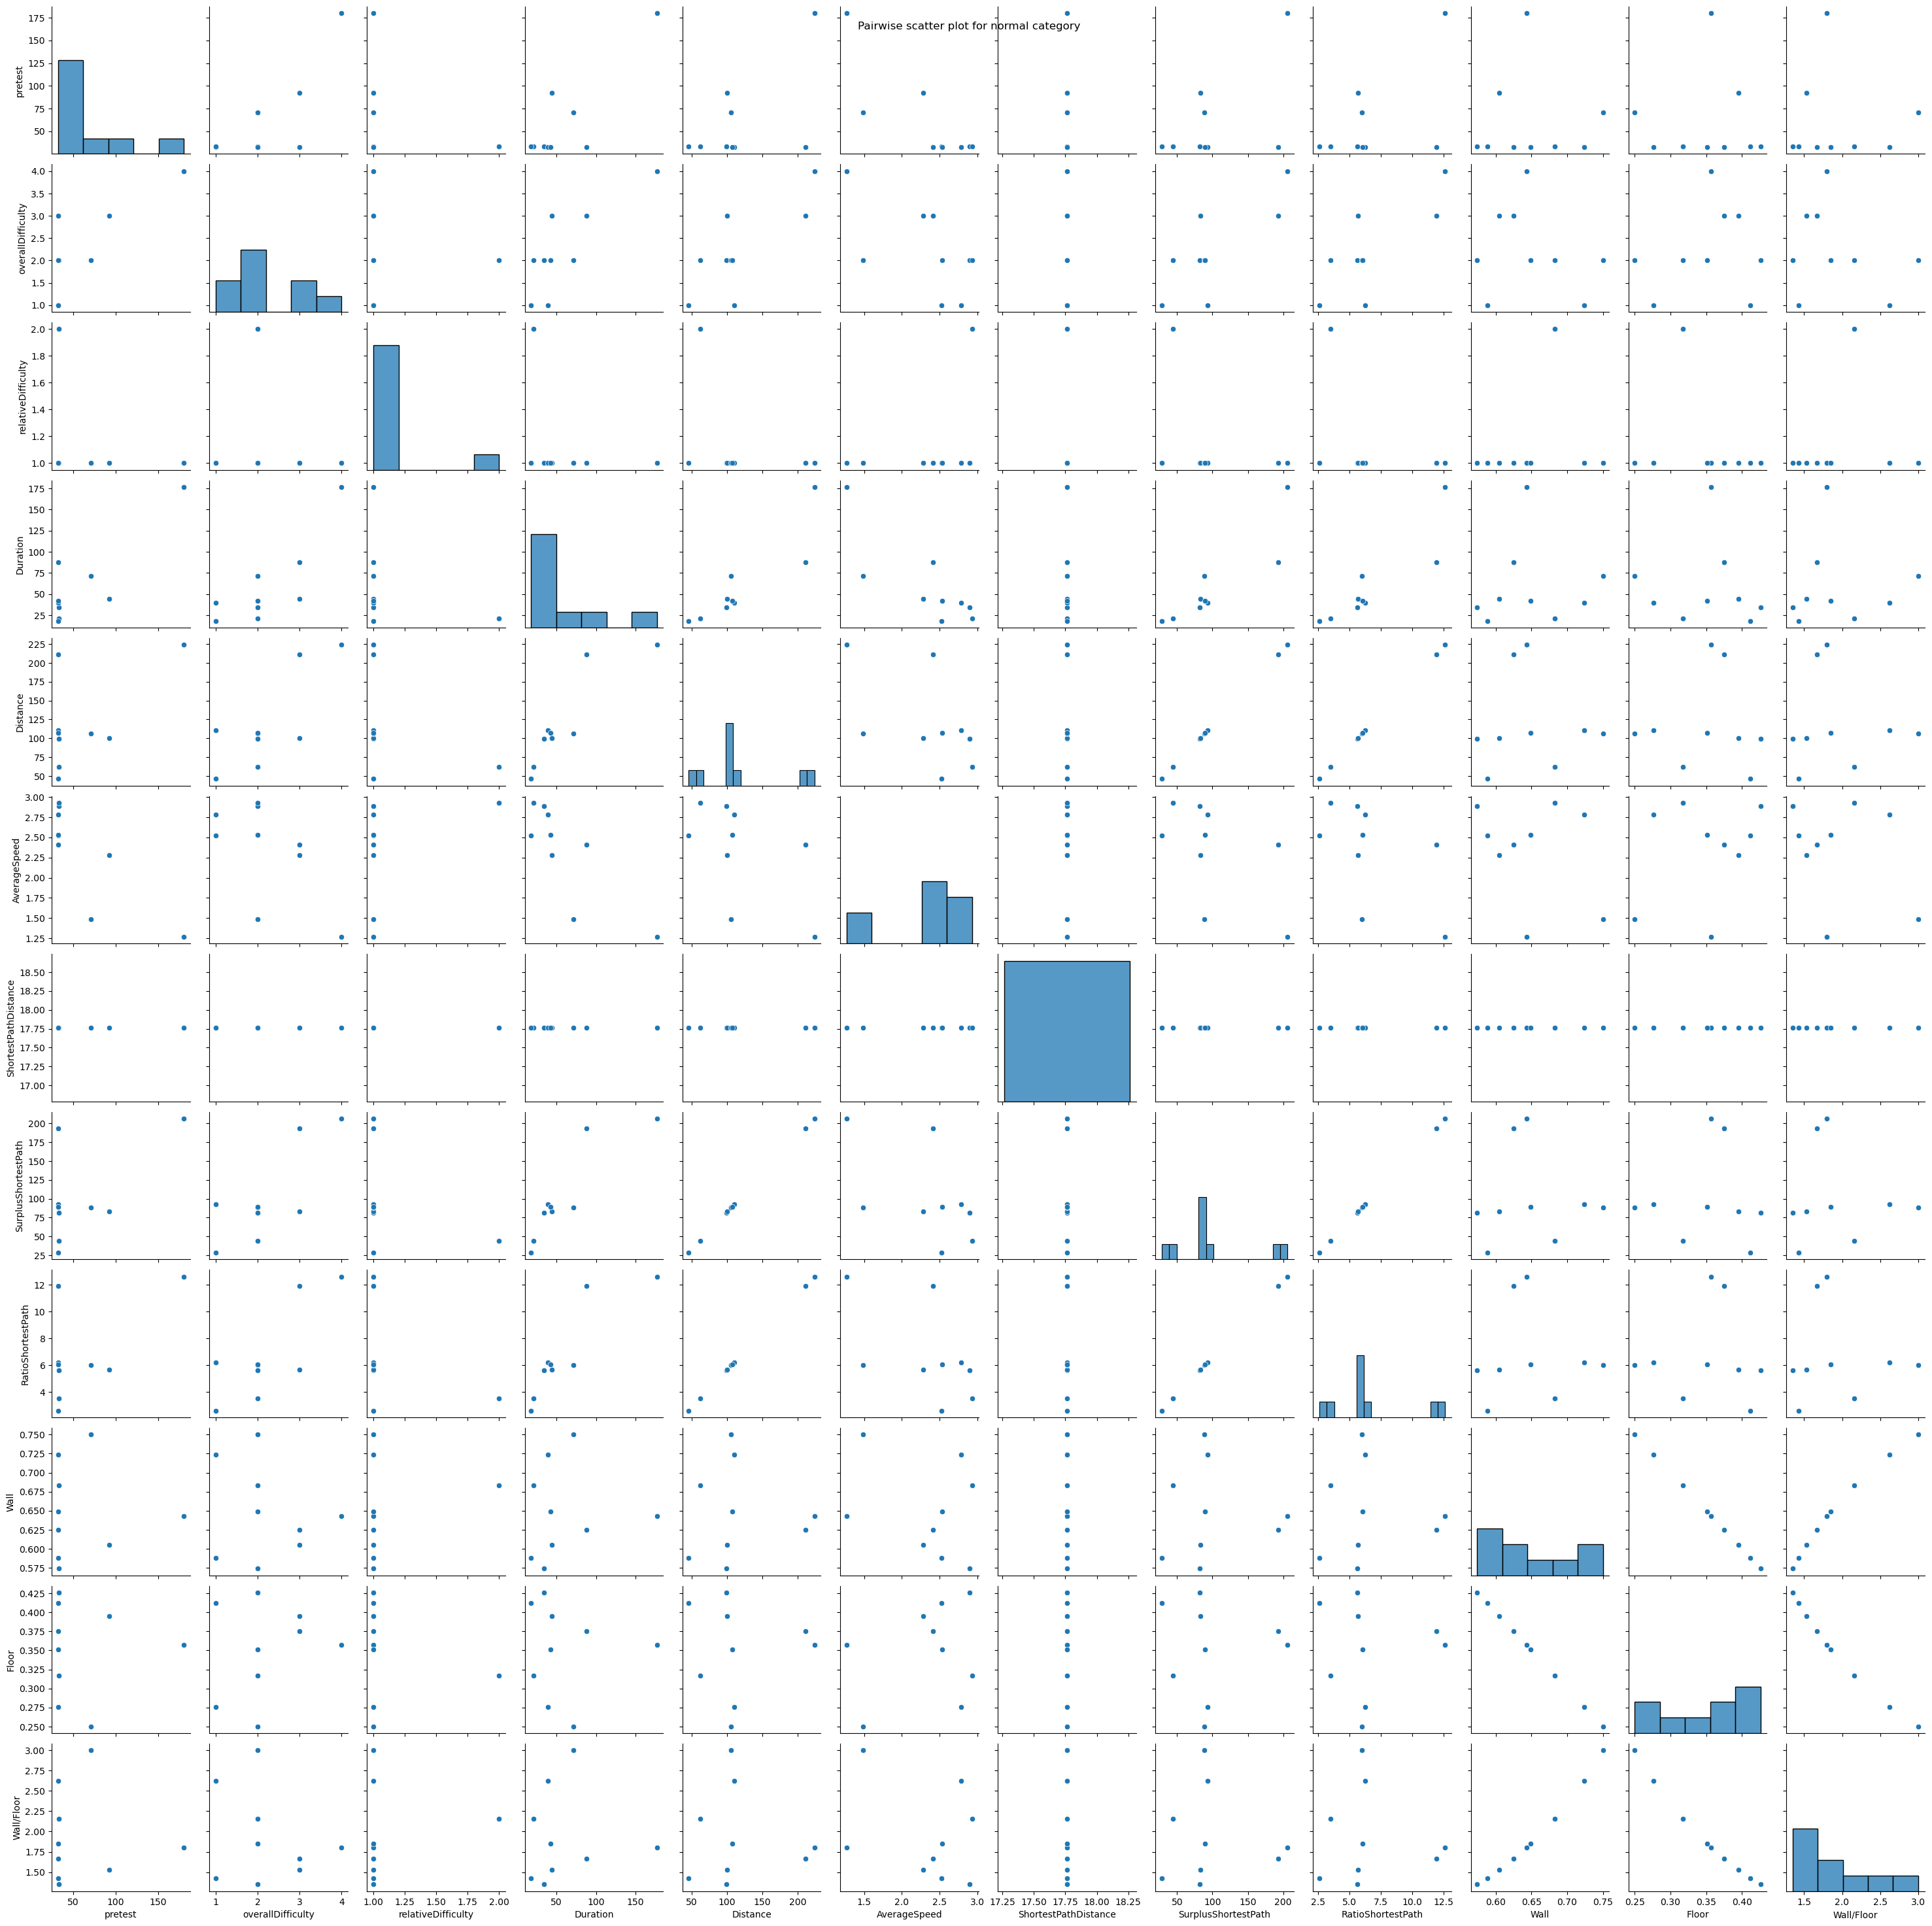

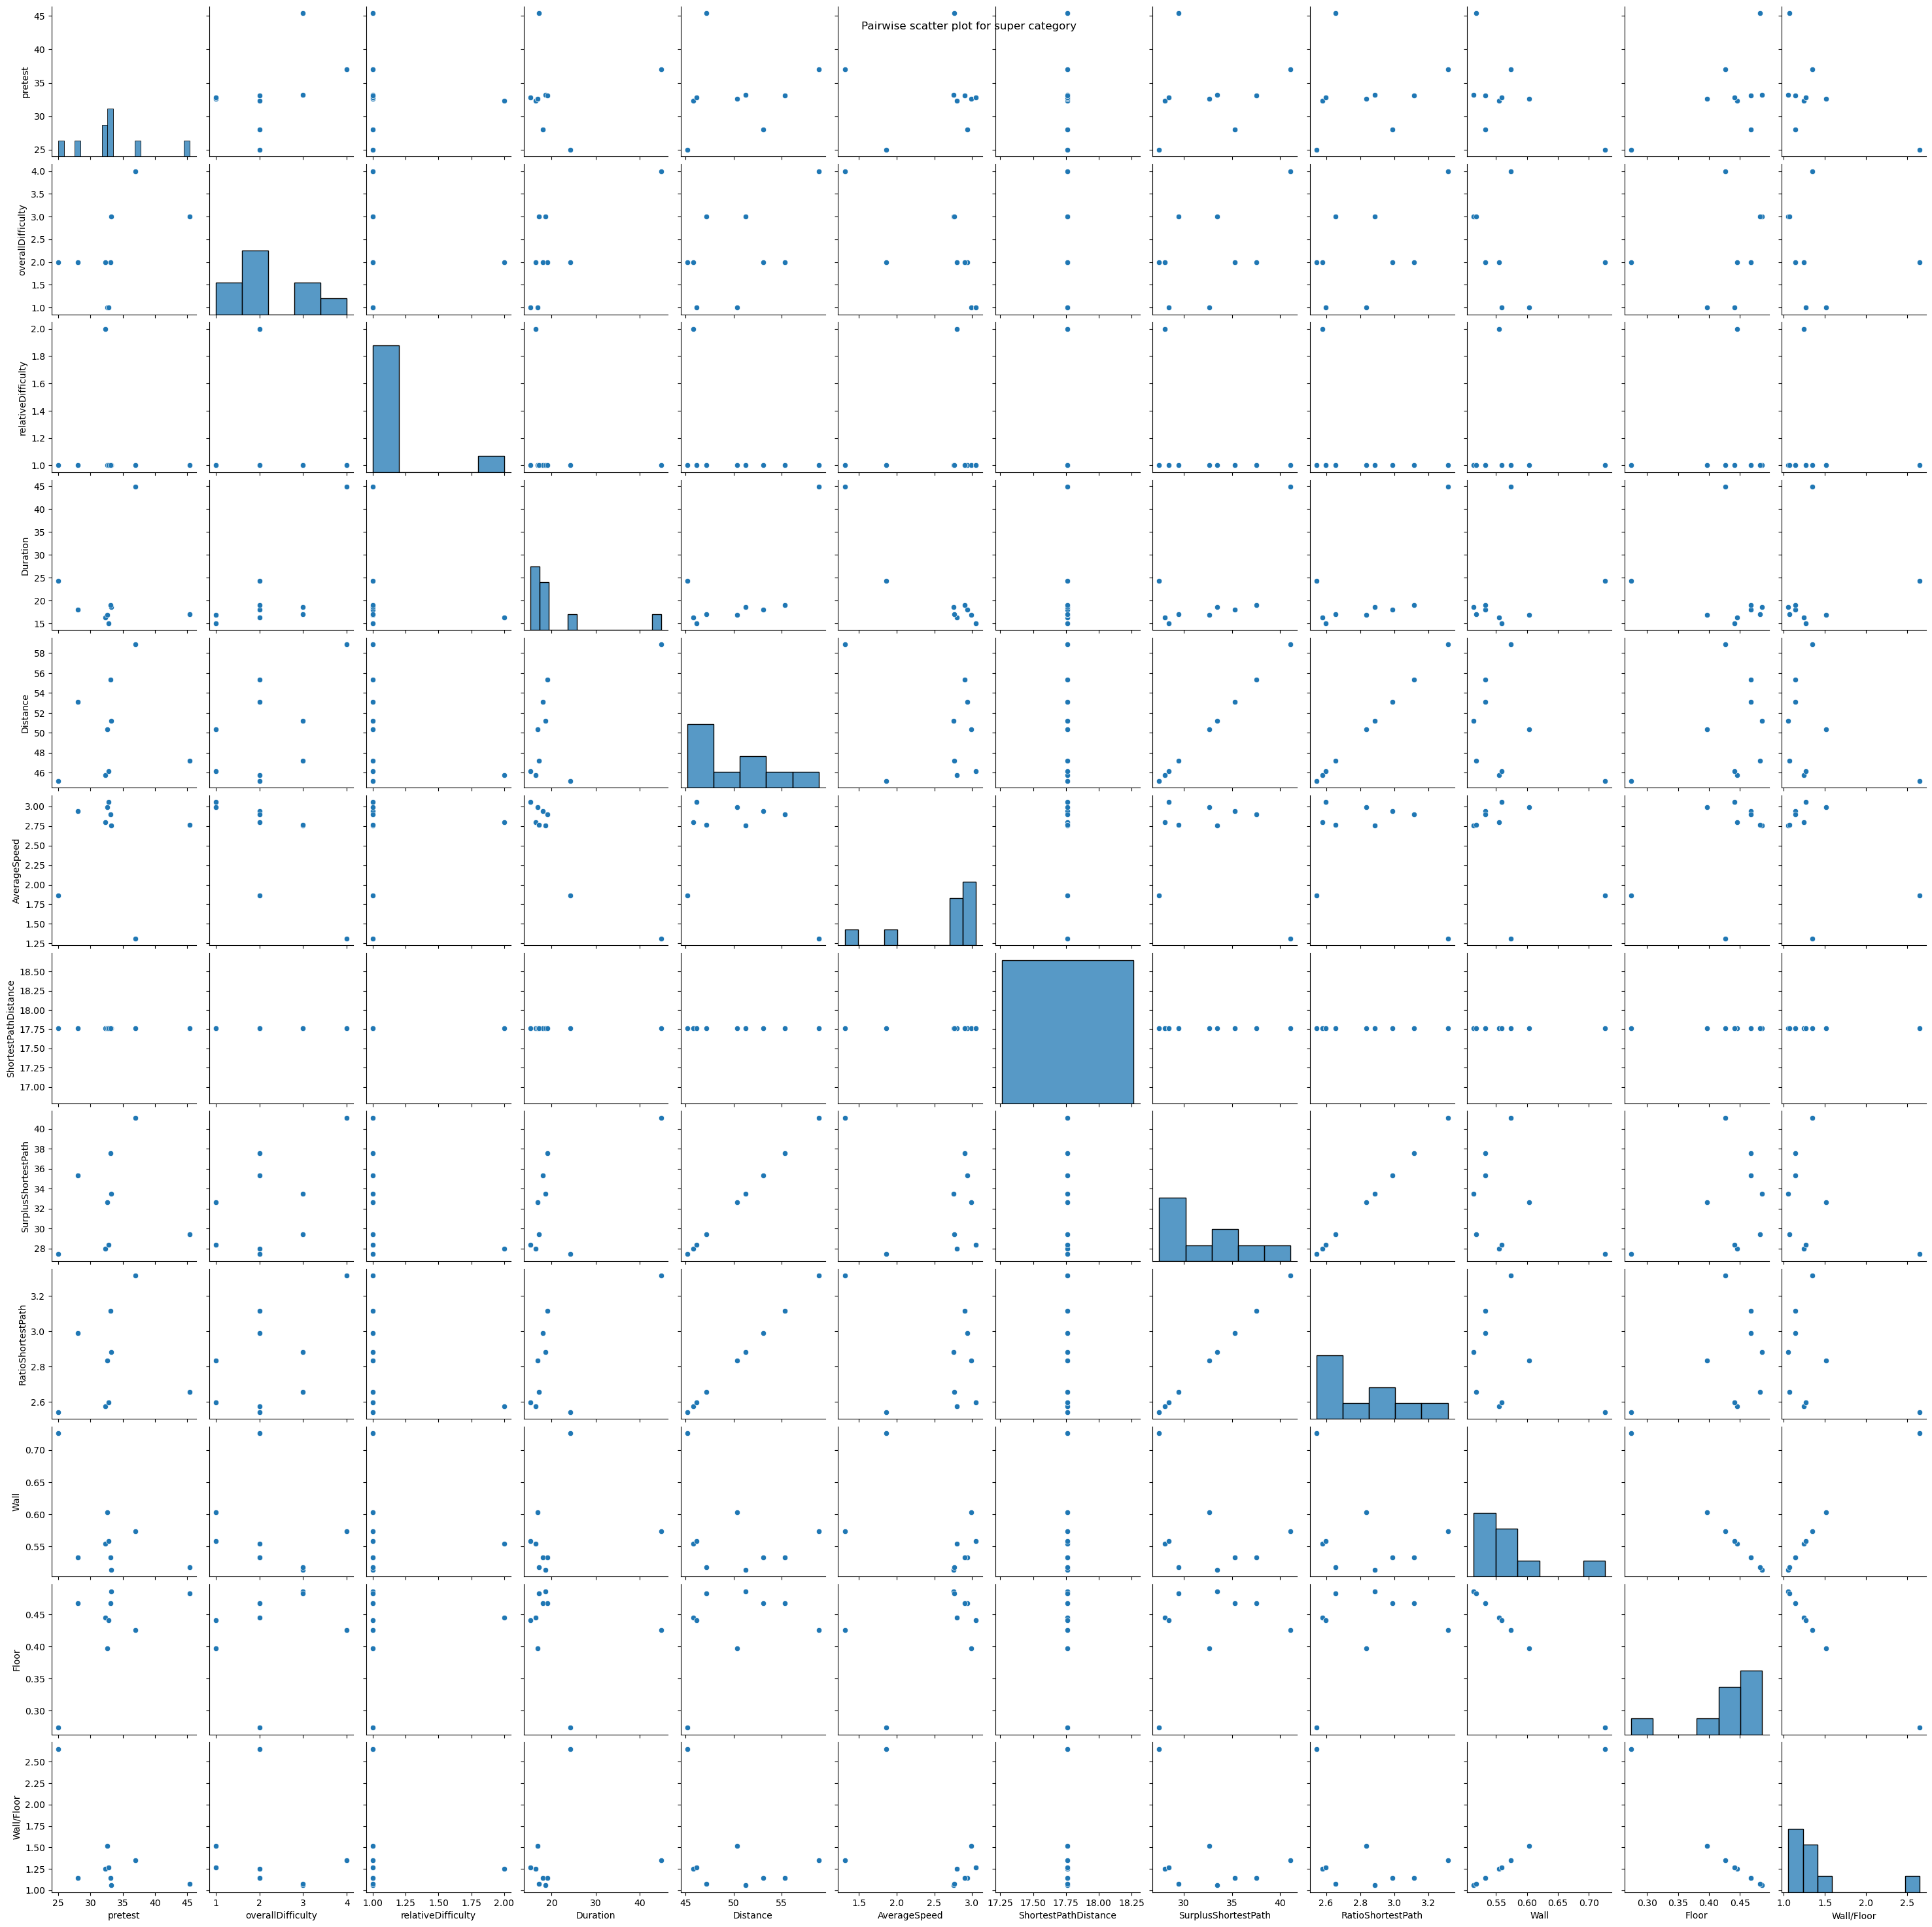

In [28]:
# plot the pairwise scatter plot of all numerical columns for normal category
sns.pairplot(data.loc[(slice(None), 'normal'), :])
plt.suptitle('Pairwise scatter plot for normal category')
plt.savefig(plot_path + '/13_pairwise_scatter_plot_normal.png', dpi=300, bbox_inches='tight')
plt.show()

# plot the pairwise scatter plot of all numerical columns for super category
sns.pairplot(data.loc[(slice(None), 'super'), :])
plt.suptitle('Pairwise scatter plot for super category')
plt.savefig(plot_path + '/14_pairwise_scatter_plot_super.png', dpi=300, bbox_inches='tight')
plt.show()
